# Weather

Charts comparing the weather in Mexico City, Zurich, and Edinburgh; used here: <https://mexico.werthmuller.org/landleute/wetter>.

In [1]:
import numpy as np
from adashof import cm2in
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

# Use ggplot style, get color_cycle, set font-size
plt.style.use('ggplot')
clr = rcParams['axes.color_cycle']
rcParams['font.size'] = 10.0
rcParams['font.sans-serif'] =  'Ubuntu'

# Adjust dpi, so figure on screen and savefig looks the same
rcParams['figure.dpi'] = 100
rcParams['savefig.dpi'] = 100

# Save-path
fpath = '../mexico.werthmuller.org/content/images/weather/'

## Raw data

The raw data is from [bbc.com/weather](http://bbc.com/weather), accessed 9 June 2015. (*Average Conditions data* is under a copyright RM 2011, see the BBC link.)

In [2]:
# Months (Added Dec at beginning, and Jan at end, for better plots.)
months = ['', 'Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez', '']
xvals = np.arange(1,15)
dxvals = np.r_[xvals, xvals[-1::-1]]

# Temperature (in °C), Precipitation (in mm), Sunlight (in h)

# Ciudad de Mexico (also Dec, Jan, ..., Dec, Jan)
CDM = {'MinT': np.array([6, 6, 6, 8, 11, 12, 13, 12, 12, 12, 10, 8, 6, 6]),
       'MaxT': np.array([19, 19, 21, 24, 25, 26, 24, 23, 23, 23, 21, 20, 19, 19]),
       'RMxT': np.array([23, 23, 27, 29, 32, 32, 31, 28, 27, 26, 26, 25, 23, 23]),
       'Prec': np.array([8, 13, 5, 10, 20, 53, 119, 170, 152, 130, 51, 18, 8, 13]),
       'Sunl': np.array([7, 7, 8, 8, 8, 7, 7, 6, 6, 6, 6, 7, 7, 7])}

# Edinburgh (also Dec, Jan, ..., Dec, Jan)
EDI = {'MinT': np.array([2, 1, 1, 2, 4, 6, 9, 11, 11, 9, 7, 4, 2, 1]),
       'MaxT': np.array([7, 6, 6, 8, 11, 14, 17, 18, 18, 16, 12, 9, 7, 6]),
       'RMxT': np.array([14, 14, 14, 20, 22, 24, 28, 28, 28, 25, 20, 19, 14, 14]),
       'Prec': np.array([57, 57, 39, 39, 39, 54, 47, 83, 77, 57, 65, 62, 57, 57]),
       'Sunl': np.array([1, 2, 3, 4, 5, 6, 6, 5, 4, 4, 3, 2, 1, 2])}

# Zurich (also Dec, Jan, ..., Dec, Jan)
ZRH = {'MinT': np.array([-2, -3, -2, 1, 4, 8, 12, 14, 13, 11, 6, 2, -2, -3]),
       'MaxT': np.array([3, 2, 5, 10, 15, 19, 23, 25, 24, 20, 14, 7, 3, 2]),
       'RMxT': np.array([15, 17, 19, 22, 30, 33, 36, 38, 36, 32, 27, 20, 15, 17]),
       'Prec': np.array([64, 74, 69, 64, 76, 101, 129, 136, 124, 102, 77, 73, 64, 74]),
       'Sunl': np.array([1, 2, 3, 5, 6, 7, 7, 8, 7, 6, 3, 2, 1, 2])}

## Plots

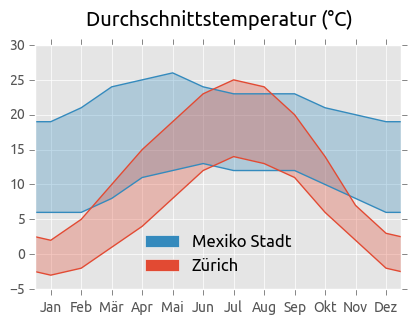

In [3]:
fig1 = plt.figure(figsize=(cm2in([12,8])))
ax1 = plt.gca()

# Plot bandwith with transparency
plt.fill(dxvals, np.r_[CDM['MinT'], CDM['MaxT'][-1::-1]], clr[1], alpha=.3)
plt.fill(dxvals, np.r_[ZRH['MinT'], ZRH['MaxT'][-1::-1]], clr[0], alpha=.3)

# Plot Min and Max
plt.plot(xvals, CDM['MaxT'], clr[1], xvals, CDM['MinT'], clr[1])
plt.plot(xvals, ZRH['MaxT'], clr[0], xvals, ZRH['MinT'], clr[0])

# Plot dummy entries for legend without transparency
plt.fill(-dxvals, -2*dxvals, clr[1], label='Mexiko Stadt')
plt.fill(-dxvals, -2*dxvals, clr[0], label='Zürich')

# Labels and axis settings
plt.title('Durchschnittstemperatur (°C)', y=1.05)
plt.legend(loc=8, frameon=False)
ax1.set_xticks(xvals)
ax1.set_xticklabels(months)
plt.axis([1.5, 13.5, -5, 30])

plt.savefig(fpath+'TempCDMZRH.png', bbox_inches='tight')

plt.show()

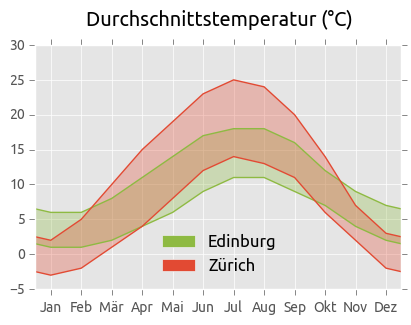

In [4]:
fig2 = plt.figure(figsize=(cm2in([12,8])))
ax2 = plt.gca()

# Plot bandwith with transparency
plt.fill(dxvals, np.r_[EDI['MinT'], EDI['MaxT'][-1::-1]], clr[5], alpha=.3)
plt.fill(dxvals, np.r_[ZRH['MinT'], ZRH['MaxT'][-1::-1]], clr[0], alpha=.3)

# Plot Min and Max
plt.plot(xvals, EDI['MaxT'], clr[5], xvals, EDI['MinT'], clr[5])
plt.plot(xvals, ZRH['MaxT'], clr[0], xvals, ZRH['MinT'], clr[0])

# Plot dummy entries for legend without transparency
plt.fill(-dxvals, -2*dxvals, clr[5], label='Edinburg')
plt.fill(-dxvals, -2*dxvals, clr[0], label='Zürich')

# Labels and axis settings
plt.title('Durchschnittstemperatur (°C)', y=1.05)
plt.legend(loc=8, frameon=False)
ax2.set_xticks(xvals)
ax2.set_xticklabels(months)
plt.axis([1.5, 13.5, -5, 30])

plt.savefig(fpath+'TempEDIZRH.png', bbox_inches='tight')

plt.show()

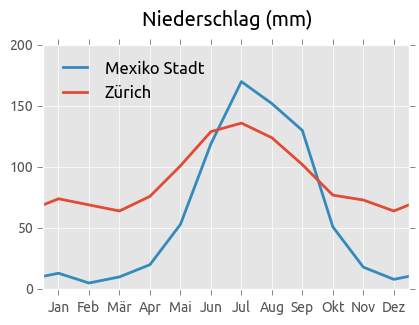

In [5]:
fig3 = plt.figure(figsize=(cm2in([12,8])))
ax3 = plt.gca()

# Plot data
plt.plot(xvals, CDM['Prec'], clr[1], lw=2, label='Mexiko Stadt')
plt.plot(xvals, ZRH['Prec'], clr[0], lw=2, label='Zürich')

# Labels and axis settings
plt.title('Niederschlag (mm)', y=1.05)
plt.legend(loc=2, frameon=False)
ax3.set_xticks(xvals)
ax3.set_xticklabels(months)
plt.axis([1.5, 13.5, 0, 200])

plt.savefig(fpath+'precCDMZRH.png', bbox_inches='tight')

plt.show()

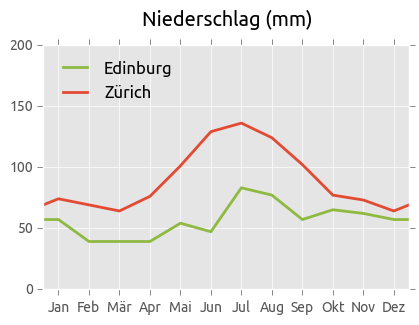

In [6]:
fig4 = plt.figure(figsize=(cm2in([12,8])))
ax4 = plt.gca()

# Plot data
plt.plot(xvals, EDI['Prec'], clr[5], lw=2, label='Edinburg')
plt.plot(xvals, ZRH['Prec'], clr[0], lw=2, label='Zürich')

# Labels and axis settings
plt.title('Niederschlag (mm)', y=1.05)
plt.legend(loc=2, frameon=False)
ax4.set_xticks(xvals)
ax4.set_xticklabels(months)
plt.axis([1.5, 13.5, 0, 200])

plt.savefig(fpath+'precEDIZRH.png', bbox_inches='tight')

plt.show()

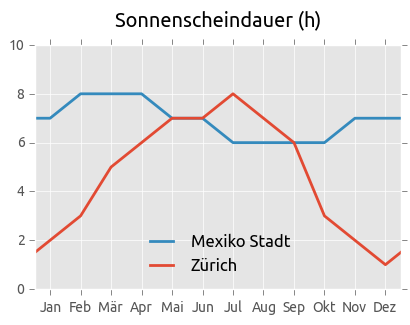

In [7]:
fig5 = plt.figure(figsize=(cm2in([12,8])))
ax5 = plt.gca()

# Plot data
plt.plot(xvals, CDM['Sunl'], clr[1], lw=2, label='Mexiko Stadt')
plt.plot(xvals, ZRH['Sunl'], clr[0], lw=2, label='Zürich')

# Labels and axis settings
plt.title('Sonnenscheindauer (h)', y=1.05)
plt.legend(loc=8, frameon=False)
ax5.set_xticks(xvals)
ax5.set_xticklabels(months)
plt.axis([1.5, 13.5, 0, 10])

plt.savefig(fpath+'SunlCDMZRH.png', bbox_inches='tight')

plt.show()

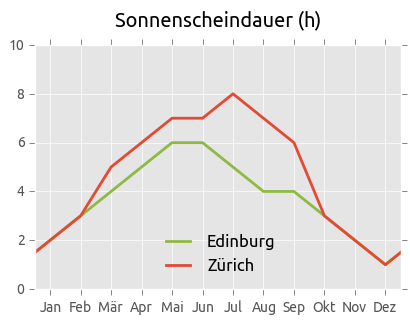

In [8]:
fig6 = plt.figure(figsize=(cm2in([12,8])))
ax6 = plt.gca()

# Plot data
plt.plot(xvals, EDI['Sunl'], clr[5], lw=2, label='Edinburg')
plt.plot(xvals, ZRH['Sunl'], clr[0], lw=2, label='Zürich')

# Labels and axis settings
plt.title('Sonnenscheindauer (h)', y=1.05)
plt.legend(loc=8, frameon=False)
ax6.set_xticks(xvals)
ax6.set_xticklabels(months)
plt.axis([1.5, 13.5, 0, 10])

plt.savefig(fpath+'SunlEDIZRH.png', bbox_inches='tight')

plt.show()

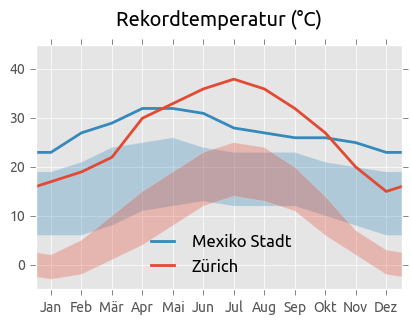

In [9]:
fig7 = plt.figure(figsize=(cm2in([12,8])))
ax7 = plt.gca()

# Plot bandwith with transparency
plt.fill(dxvals, np.r_[CDM['MinT'], CDM['MaxT'][-1::-1]], clr[1], alpha=.3)
plt.fill(dxvals, np.r_[ZRH['MinT'], ZRH['MaxT'][-1::-1]], clr[0], alpha=.3)

# Plot record data
plt.plot(xvals, CDM['RMxT'], clr[1], lw=2, label='Mexiko Stadt')
plt.plot(xvals, ZRH['RMxT'], clr[0], lw=2, label='Zürich')

# Labels and axis settings
plt.title('Rekordtemperatur (°C)', y=1.05)
plt.legend(loc=8, frameon=False)
ax7.set_xticks(xvals)
ax7.set_xticklabels(months)
plt.axis([1.5, 13.5, -5, 45])

plt.savefig(fpath+'RMxTCDMZRH.png', bbox_inches='tight')

plt.show()

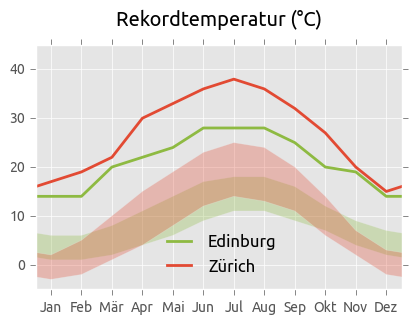

In [10]:
fig8 = plt.figure(figsize=(cm2in([12,8])))
ax8 = plt.gca()

# Plot bandwith with transparency
plt.fill(dxvals, np.r_[EDI['MinT'], EDI['MaxT'][-1::-1]], clr[5], alpha=.3)
plt.fill(dxvals, np.r_[ZRH['MinT'], ZRH['MaxT'][-1::-1]], clr[0], alpha=.3)

# Plot record data
plt.plot(xvals, EDI['RMxT'], clr[5], lw=2, label='Edinburg')
plt.plot(xvals, ZRH['RMxT'], clr[0], lw=2, label='Zürich')

# Labels and axis settings
plt.title('Rekordtemperatur (°C)', y=1.05)
plt.legend(loc=8, frameon=False)
ax8.set_xticks(xvals)
ax8.set_xticklabels(months)
plt.axis([1.5, 13.5, -5, 45])

plt.savefig(fpath+'RMxTEDIZRH.png', bbox_inches='tight')

plt.show()